## Defining the isolation forest kernel

In [1]:
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import stats 
# use seaborn plotting defaults 
import seaborn as sns; sns.set() 

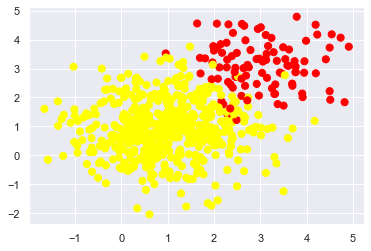

In [2]:
from sklearn.datasets import make_blobs 
X, y = make_blobs(n_samples=[100, 500], centers=[[3,3], [1,1]], 
                 random_state=0, cluster_std=[0.80, 1.0]) 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn'); 


In [3]:
print(X.shape)
print(y.shape)

(600, 2)
(600,)


In [4]:
from sklearn.svm import SVC # "Support vector classifier" 
from sklearn.metrics.pairwise import laplacian_kernel

model = SVC(kernel='linear', C=1E10) 
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [5]:
model.decision_function

<bound method BaseSVC.decision_function of SVC(C=10000000000.0, kernel='linear')>

In [6]:
model.support_vectors_

array([[3.50018516, 1.71835388],
       [1.70888172, 2.82980778],
       [2.59135589, 2.05549425],
       [2.2897714 , 1.41536283],
       [1.96571447, 3.2136407 ],
       [2.35727227, 2.44836018],
       [3.25045416, 2.31672341],
       [1.94727407, 2.63073232],
       [2.44434571, 2.88029237],
       [2.40419614, 2.33884917],
       [2.19982772, 1.76418312],
       [2.48510528, 1.22127748],
       [2.71680487, 1.90003897],
       [2.34948297, 1.61897392],
       [1.60815643, 2.11496232],
       [2.46657872, 1.85255194],
       [2.95591231, 1.39009332],
       [1.93674246, 2.41232771],
       [2.51999486, 2.71958931],
       [4.17097477, 1.18949964],
       [2.73887268, 1.99439439],
       [2.10028434, 2.29802197],
       [1.48111513, 3.75935511],
       [3.25930895, 0.95774285],
       [1.89526027, 2.37496407],
       [1.04513402, 3.33962481],
       [2.41117206, 1.78580383],
       [3.52636824, 2.76992139],
       [2.0996596 , 1.65526373]])

In [7]:
model.decision_function

<bound method BaseSVC.decision_function of SVC(C=10000000000.0, kernel='linear')>

In [8]:
def plot_svc_decision_function(model, ax=None, plot_support=True): 
   """Plot the decision function for a 2D SVC""" 
   if ax is None: 
       ax = plt.gca() # Get the current Axes instance on the current figure mat ching the given keyword args, or create one. 
   xlim = ax.get_xlim() 
   ylim = ax.get_ylim() 
    
   # create grid to evaluate model 
   x = np.linspace(xlim[0], xlim[1], 30) 
   y = np.linspace(ylim[0], ylim[1], 30) 
   Y, X = np.meshgrid(y, x) # 30 x 30 each 
   xy = np.vstack([X.ravel(), Y.ravel()]).T # 900 x 2 
   print("size of xy", xy.shape) 
    
   P = model.decision_function(xy).reshape(X.shape) #model.decision_function(xy) return 900 x 1 
   # Returns the decision function of the sample for each class in the model 
   print("size of P", P.shape) # 30 x 30 
   # plot decision boundary and margins   #  draw contour lines 
   ax.contour(X, Y, P, colors='k', 
              levels=[-1, 0, 1], alpha=0.5, 
              linestyles=['--', '-', '--']) 
    
   # plot support vectors 
   if plot_support: 
       ax.scatter(model.support_vectors_[:, 0], 
                  model.support_vectors_[:, 1], 
                  s=50, linewidth=1, facecolors='Blue'); 
   ax.set_xlim(xlim) 
   ax.set_ylim(ylim) 

size of xy (900, 2)
size of P (30, 30)


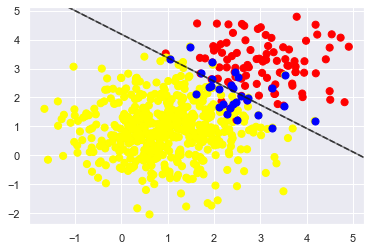

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') 
plot_svc_decision_function(model);

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.metrics.pairwise import laplacian_kernel

# iris_data = load_iris()

# X = iris_data.data[:, :2]
# y = iris_data.target
h = 0.02

# K = 1.0 - iso.predict_distance(X, use_reference_points=True)
K = laplacian_kernel(X,gamma=.5)
print(K)
svm = SVC(kernel='precomputed').fit(K, y)

[[1.         0.05552132 0.4887991  ... 0.24587755 0.48172554 0.04287825]
 [0.05552132 1.         0.1135872  ... 0.08684944 0.11525509 0.28331802]
 [0.4887991  0.1135872  1.         ... 0.18172725 0.43439557 0.08772163]
 ...
 [0.24587755 0.08684944 0.18172725 ... 1.         0.41834509 0.06707247]
 [0.48172554 0.11525509 0.43439557 ... 0.41834509 1.         0.08900971]
 [0.04287825 0.28331802 0.08772163 ... 0.06707247 0.08900971 1.        ]]


In [11]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_test = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

xx,yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

In [12]:
x_test = np.vstack([xx.ravel(),yy.ravel()]).T

K_test = laplacian_kernel(x_test, X,  gamma=.5)
Z = svm.predict(K_test)
Z = Z.reshape(xx.shape)

(600,)


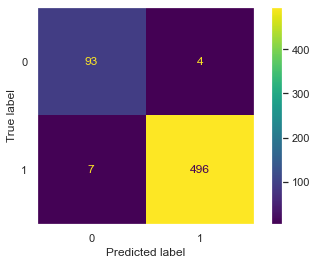

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Z1 = svm.predict(K)
print(Z1.shape)
cm = confusion_matrix(Z1, y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.grid(False)
plt.show()
# print(Z1)
# print(y)

(-3.0461430547999266, 5.77385694520008)

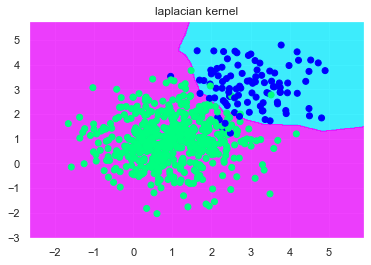

In [28]:
plt.contourf(xx, yy, Z, cmap=plt.cm.cool, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.winter)
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')
plt.title('laplacian kernel')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In [29]:
from isotree import IsolationForest
from sklearn.base import TransformerMixin, BaseEstimator


class IsoDistKernel(TransformerMixin, BaseEstimator):
    def __init__(self, isotree_params: dict = {}):
        self.isotree_params = isotree_params

    def fit(self, X, y=None, sample_weights=None):
        self.iso_ = IsolationForest(**self.isotree_params)
        self.iso_.fit(X).set_reference_points(X, with_distances=True)
        return self

    def transform(self, X):
        D = self.iso_.predict_distance(X, use_reference_points=True)
        return 1 - D


# Evaluating results with this kernel

In [30]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from pprint import pprint

model = make_pipeline(
    IsoDistKernel(
        {"ndim": 1, "sample_size": 256, "ntrees": 250, "missing_action": "fail"}
    ),
    SVC(kernel="precomputed"),
)
cv_res_iso = cross_validate(
    estimator=model,
    X=X,
    y=y,
    scoring="roc_auc",
    n_jobs=1,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1),
)
print("Cross-validation results (distance isolation kernel):")
pprint(cv_res_iso)
print("----")
print("Mean CV AUROC: %.4f" % cv_res_iso["test_score"].mean())


Cross-validation results (distance isolation kernel):
{'fit_time': array([0.10522366, 0.07313967, 0.06361556, 0.06411195, 0.06370282]),
 'score_time': array([0.01653147, 0.01803327, 0.01302195, 0.01352453, 0.01151824]),
 'test_score': array([0.999, 0.985, 0.99 , 0.998, 0.989])}
----
Mean CV AUROC: 0.9922


## More efficient calculation for fitted model

In practice SVM models only end up using a fraction of the total observations in their prediction formula (these are the so-called "support vectors").

Only distances with respect to support vectors are needed.


In [32]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles

# X, y = make_gaussian_quantiles(n_features=2, n_classes=2, n_samples=200)

In [33]:
iso = IsolationForest().fit(X).set_reference_points(X, with_distances=True)
K = 1 - iso.predict_distance(X, use_reference_points=True)
svm = SVC(kernel="precomputed").fit(K, y)
print(K.shape)
p_auto = svm.decision_function(K[:10]).reshape(-1)
print("Prediction from automated call to 'decision_function':")
print(p_auto)

d:\anaconda3\lib\site-packages\isotree\__init__.py:1910: UserWarning: Model was meant to take 3 variables for each split, but data has 2 columns. Will decrease number of splitting variables to match number of columns.
  warnings.warn(msg)


(600, 600)
Prediction from automated call to 'decision_function':
[ 1.3367281  -1.12034055  1.38879494  0.78207626  1.41884562 -1.00038669
  1.37739556 -1.15386039  1.60483199  1.44989069]


In [34]:
print(K)
# plt.scatter(K[:, 0], K[:, 1], c=y, s=50, cmap='autumn');

[[0.98314874 0.4103217  0.7887534  ... 0.64051587 0.80028702 0.372364  ]
 [0.4103217  0.96669229 0.50585717 ... 0.37885586 0.46965613 0.61975531]
 [0.7887534  0.50585717 0.98127642 ... 0.58476499 0.78251316 0.43080299]
 ...
 [0.64051587 0.37885586 0.58476499 ... 0.98363225 0.76101367 0.44483058]
 [0.80028702 0.46965613 0.78251316 ... 0.76101367 0.98401348 0.47912829]
 [0.372364   0.61975531 0.43080299 ... 0.44483058 0.47912829 0.97862601]]


In [35]:
sv = [X[t] for t in svm.support_]
sv = np.array(sv)
print(sv)

[[ 4.50652056  1.92179275]
 [ 2.96857375  2.0655252 ]
 [ 2.46203164  2.71235747]
 [ 3.30114042  2.12047937]
 [ 3.91152055  2.01213934]
 [ 3.50018516  1.71835388]
 [ 1.70888172  2.82980778]
 [ 2.16115763  1.86398565]
 [ 2.59135589  2.05549425]
 [ 2.66910482  2.40203615]
 [ 1.99776371  3.62199228]
 [ 2.49254233  2.70980707]
 [ 1.63498385  4.56062032]
 [ 1.69584132  3.3702258 ]
 [ 2.2897714   1.41536283]
 [ 2.11649333  3.04173206]
 [ 2.30336228  2.53692027]
 [ 1.96571447  3.2136407 ]
 [ 2.35727227  2.44836018]
 [ 0.95760815  3.52289488]
 [ 1.80699393  3.35151336]
 [ 2.08202508  2.64974396]
 [ 1.94727407  2.63073232]
 [ 2.92123798  2.46921737]
 [ 4.8158037   1.83650746]
 [ 2.59227825  2.64954056]
 [ 2.06150128  4.55489695]
 [ 2.40419614  2.33884917]
 [ 2.19982772  1.76418312]
 [ 3.31680537  2.12555079]
 [ 1.983612    3.77551737]
 [ 3.37252995  1.77100505]
 [ 2.27416131  3.04155632]
 [ 2.48510528  1.22127748]
 [ 2.01965158  3.67549038]
 [ 2.71680487  1.90003897]
 [ 2.34948297  1.61897392]
 

In [36]:
idx_used = svm.support_
print("Number of reference points picked: %d" % idx_used.shape[0])
iso.set_reference_points(X[idx_used], with_distances=True)
K_used = 1.0 - iso.predict_distance(X[:10], use_reference_points=True)
p_manual = K_used.dot(svm.dual_coef_.reshape(-1)) + svm.intercept_[0]
print("Prediction from manual formula using only selected reference points:")
print(p_manual)


Number of reference points picked: 77
Prediction from manual formula using only selected reference points:
[ 1.3367281  -1.12034055  1.38879494  0.78207626  1.41884562 -1.00038669
  1.37739556 -1.15386039  1.60483199  1.44989069]


In [37]:
x1 = np.array(X[0:10])
K_used1 = 1.0 - iso.predict_distance(x1, use_reference_points=True)
p_manual1 = K_used1.dot(svm.dual_coef_.reshape(-1)) + svm.intercept_[0]
print("Prediction from manual formula using only selected reference points:")
print(p_manual1)

Prediction from manual formula using only selected reference points:
[ 1.3367281  -1.12034055  1.38879494  0.78207626  1.41884562 -1.00038669
  1.37739556 -1.15386039  1.60483199  1.44989069]


In [38]:
def plot_svc_decision_function_2(model, sv, ax=None, plot_support=True): 
    """Plot the decision function for a 2D SVC""" 
    if ax is None: 
        ax = plt.gca() # Get the current Axes instance on the current figure mat ching the given keyword args, or create one. 
    xlim = ax.get_xlim() 
    ylim = ax.get_ylim() 

    # create grid to evaluate model 
    x = np.linspace(xlim[0], xlim[1], 20) 
    y = np.linspace(ylim[0], ylim[1], 20) 
    Y, X = np.meshgrid(y, x) # 30 x 30 each 
    xy = np.vstack([X.ravel(), Y.ravel()]).T # 900 x 2 
    print("size of xy", xy.shape)

    K_used = 1.0 - iso.predict_distance(xy, use_reference_points=True)
    p_manual = K_used.dot(svm.dual_coef_.reshape(-1)) + svm.intercept_[0]
    print(p_manual.shape)
    
    # P = model.decision_function(xy).reshape(X.shape) #model.decision_function(xy) return 900 x 1 
    P = p_manual.reshape(X.shape)
    # Returns the decision function of the sample for each class in the model 
    print("size of P", P.shape) # 30 x 30 
    # plot decision boundary and margins   #  draw contour lines 
    ax.contour(X, Y, P, colors='k', 
                levels=[-1, 0, 1], alpha=0.5, 
                linestyles=['--', '-', '--']) 

    # plot support vectors 
    if plot_support: 
        ax.scatter(sv[:, 0], 
                    sv[:, 1], 
                    s=100, linewidth=1, facecolors='Blue'); 
    ax.set_xlim(xlim) 
    ax.set_ylim(ylim) 

size of xy (400, 2)
(400,)
size of P (20, 20)


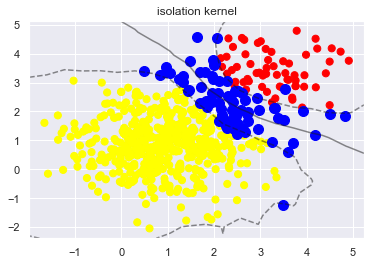

In [40]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.title('isolation kernel')
plot_svc_decision_function_2(svm, sv)

## Sub-sampled kernel

While SVM models typically involve efficient optimization routines for square kernel matrices which end up identifying the best reference points (support vectors) to use in the final prediction formula, it is also possible to use the trick with a plain generalized linear model such as logistic regression by instead supplying features that are the kernels with respect to randomly-sampled points within the data.

This is faster to calculate as a kernel, but typically the results are not as good quality as when using a full square matrix, since the support vectors are randomly-chosen.


In [41]:
from sklearn.linear_model import LogisticRegression
import numpy as np


class IsoSubSampledDistKernel(TransformerMixin, BaseEstimator):
    def __init__(self, isotree_params: dict = {}, n_samples=250, random_state=None):
        self.isotree_params = isotree_params
        self.n_samples = n_samples
        self.random_state = random_state

    def fit(self, X, y=None, sample_weights=None):
        self.iso_ = IsolationForest(**self.isotree_params)
        self.iso_.fit(X)
        rng = np.random.default_rng(seed=self.random_state)
        idx_random = rng.choice(X.shape[0], size=self.n_samples)
        self.iso_.set_reference_points(X[idx_random], with_distances=True)
        return self

    def transform(self, X):
        D = self.iso_.predict_distance(X, use_reference_points=True)
        return 1 - D


model_subsampled = make_pipeline(
    IsoSubSampledDistKernel(
        {"ndim": 1, "sample_size": 256, "ntrees": 250, "missing_action": "fail"},
        n_samples=250,
        random_state=456,
    ),
    LogisticRegression(solver="lbfgs", max_iter=10000),
)
cv_res_iso_subsampled = cross_validate(
    estimator=model_subsampled,
    X=X,
    y=y,
    scoring="roc_auc",
    n_jobs=1,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1),
)
print("Cross-validation results (randomly sub-sampled distance isolation kernel):")
pprint(cv_res_iso_subsampled)
print("----")
print("Mean CV AUROC: %.4f" % cv_res_iso_subsampled["test_score"].mean())


Cross-validation results (randomly sub-sampled distance isolation kernel):
{'fit_time': array([0.12080669, 0.10276008, 0.08276558, 0.09674978, 0.07019949]),
 'score_time': array([0.01604748, 0.01102948, 0.01705503, 0.01553416, 0.01504636]),
 'test_score': array([1.    , 0.9905, 0.993 , 0.9965, 0.989 ])}
----
Mean CV AUROC: 0.9938
